In [28]:
import pandas as pd
import numpy as np
# Create a synthetic dataset
np.random.seed(42)
# Independent variables
speed_limit = np.random.randint(30, 70, 100)
weather_condition = np.random.choice(['Clear', 'Rainy', 'Snowy'], 100)
road_condition = np.random.choice(['Dry', 'Wet'], 100)
# Dependent variable (accident severity)
accident_severity = 2 * speed_limit + (weather_condition == 'Rainy') * 20 + (road_condition == 'Wet') * 15 + np.random.normal(0, 10, 100)
# Create a DataFrame
data = pd.DataFrame({
    'SpeedLimit': speed_limit,
    'WeatherCondition': weather_condition,
    'RoadCondition': road_condition,
    'AccidentSeverity': accident_severity
})
# Display the dataset
print(data.head())
# Save the dataset to a CSV file
data.to_csv('accident_dataset.csv', index=False)


   SpeedLimit WeatherCondition RoadCondition  AccidentSeverity
0          68            Snowy           Dry        145.206667
1          58            Snowy           Dry        113.732775
2          44            Rainy           Wet        129.530483
3          37            Clear           Dry         85.026875
4          50            Snowy           Dry         81.501971


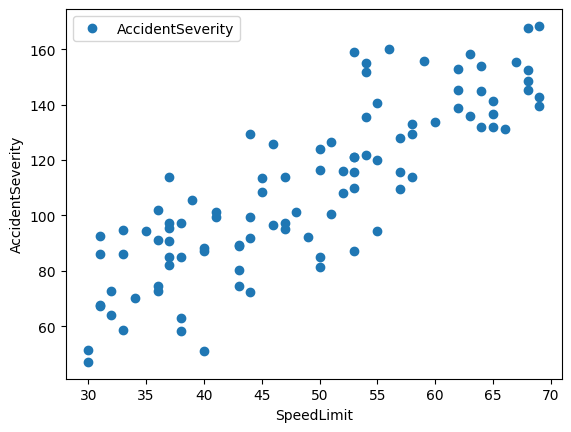

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('/content/accident_dataset.csv')
data.plot(x='SpeedLimit',y='AccidentSeverity',style='o')
plt.xlabel('SpeedLimit')
plt.ylabel('AccidentSeverity')
plt.show()


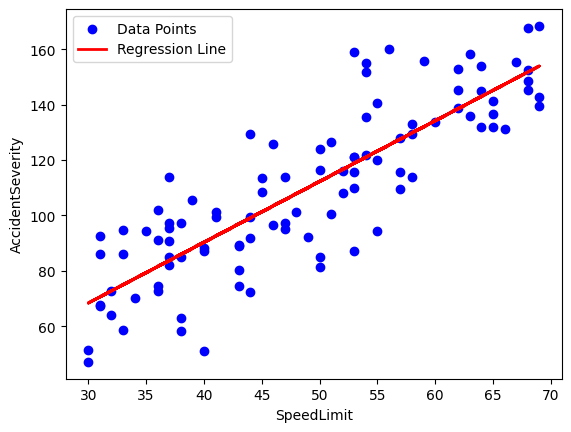

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("/content/accident_dataset.csv")

# Extract the independent variable (X) and dependent variable (y)
X = data[["SpeedLimit"]]
y = data["AccidentSeverity"]

# Create and fit a linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Plot the data points
plt.scatter(X, y, color='blue', marker='o', label='Data Points')

# Overlay the regression line
plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')

plt.xlabel("SpeedLimit")
plt.ylabel("AccidentSeverity")
plt.legend()
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/accident_dataset.csv")
x=pd.DataFrame(data['SpeedLimit'])
y=pd.DataFrame(data['AccidentSeverity'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80, 1)
(20, 1)


In [29]:
print(regressor.intercept_)


[-1.05156954]


In [15]:
print(regressor.coef_)


[[2.26319819]]


In [17]:
y_pred=regressor.predict(x_test)
y_pred

array([[ 84.94996166],
       [118.8979345 ],
       [112.10833994],
       [118.8979345 ],
       [127.95072726],
       [118.8979345 ],
       [105.31874537],
       [ 66.84437615],
       [112.10833994],
       [ 82.68676347],
       [152.84590735],
       [ 96.26595261],
       [130.21392545],
       [ 73.63397072],
       [155.10910554],
       [ 80.42356528],
       [148.31951097],
       [127.95072726],
       [121.16113269],
       [118.8979345 ]])

In [18]:
#y_test
#print(y_test)
y_test.head(10)

,AccidentSeverity
80,62.920857
84,158.812911
33,123.967743
81,121.094005
93,109.370746
17,87.134720
36,97.272234
82,51.424511
69,116.409074
65,114.003481


In [22]:
from sklearn import metrics
import numpy as np
# Assuming y_test  and y_pred are Numpy arrays or pandas series
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)#rmse is the squareroot of mse

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 14.180591383114342
Mean Squared Error (MSE): 324.4588809805435
Root Mean Squared Error (RMSE): 18.012742183813753


In [26]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression

# Train your linear regression model
model = LinearRegression()
model.fit(x_train,y_train)  # Replace x and y with your training data

# Save the trained model to a file using joblib
joblib.dump(model, 'linear_regression_model.pkl')

# Alternatively, you can save the model using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [27]:
import joblib
import pandas as pd
import numpy as np

# Load the saved model
model = joblib.load('linear_regression_model.pkl')

# Assuming you have a new or test dataset
new_x = np.array([6, 7, 8, 9, 10]).reshape(-1, 1)

# Make predictions using the loaded model
predictions = model.predict(new_x)
#create a DataFrame with one dimensional array
new_data=pd.DataFrame({'x':new_x.flatten(),'predict_Y':predictions.flatten()})

print(new_data)


    x  predict_Y
0   6  12.527620
1   7  14.790818
2   8  17.054016
3   9  19.317214
4  10  21.580412


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
